In [1]:
from fq_coupling import *
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams['font.family'] = "STIXGeneral"
plt.rcParams['font.size'] = 12

In [2]:
system = Couple("PF6FQ.csv", internal_data=True) # You can also use your own file path: Couple(path_of_your_csvfile)
EJ = np.full(6, 15.5)
df_1q, df_gij = system.calculate_all(EJ)
display(df_1q)

,EC (MHz),EJ (GHz),Frequency (GHz),Anharmonicity (MHz),g_rq (MHz),C_xy (fF)
Q0,176.698553,15.5,4.493341,-191.706496,93.364732,-0.283993
Q1,176.721120,15.5,4.493615,-191.731938,93.110225,-0.201150
Q2,176.769071,15.5,4.494197,-191.785999,93.401929,-0.150566
Q3,176.836733,15.5,4.495020,-191.862283,93.374546,-0.085003
Q4,176.682451,15.5,4.493145,-191.688343,93.334828,-0.134537
Q5,176.708434,15.5,4.493461,-191.717635,93.271186,-0.228354


In [3]:
system = Couple("2FQ1FC-L.csv", internal_data=True)
EJ = system.solve_EJ([4.88, 4.33, 4.58])
df_1q, df_gij = system.calculate_all(EJ)
display(df_1q)
display(df_gij)

,EC (MHz),EJ (GHz),Frequency (GHz),Anharmonicity (MHz),g_rq (MHz),C_xy (fF)
C0,155.799726,20.409300,4.88,-166.628356,62.821202,0.000000
Q0,174.585768,14.599009,4.33,-189.773366,39.651265,0.094110
Q1,174.681273,16.248203,4.58,-189.089295,-40.976373,-0.122898


,C0,Q0,Q1
C0,0.0,-56.756671,-60.569061
Q0,0.0,0.000000,-1.313969
Q1,0.0,0.000000,0.000000


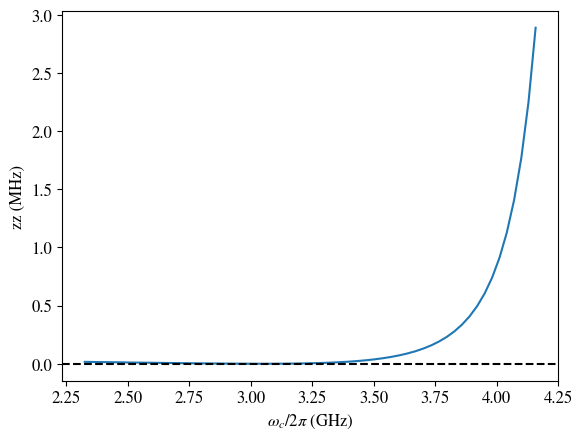

In [5]:
import matplotlib.pyplot as plt
plt.rcParams["mathtext.fontset"] = "stix"
plt.rcParams['font.family'] = "STIXGeneral"
plt.rcParams['font.size'] = 12

EJc_list = np.linspace(5, 15, 51)
fc_list = []
zz_list = []

system = Couple("2FQ1FC-L.csv", internal_data=True)
EJ = system.solve_EJ([4.3, 4.4, 4.5])
for EJc in EJc_list:
    EJ[0] = EJc
    fc_list.append(system.get_freq(EJ)[0])
    zz_list.append(system.get_zz(EJ, 1, 2) * 1e3)
plt.figure()
plt.plot(fc_list, zz_list)
plt.axhline(0, ls='--', c='k')
plt.xlabel("$\omega_c / 2\pi$ (GHz)")
plt.ylabel("zz (MHz)")
plt.show()